## <font color='blue'> Section 5. Data Modelling </font>

Next, we will consider different modelling techniques to see which can best represent our data. In this case, we aim to fit a model capable of Multiclass Classification
in order to predict the outcome of the game (win, draw, loss) given the feature set.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('./result.csv')

<font color='white'> **Note**: We will be looking at the modelling done in this kaggle project: ww.kaggle.com/saife245/football-match-prediction. </font>

In [ ]:
data.columns

Index(['Unnamed: 0', 'club_game', 'result', 'game_id', 'competition_code',
       'season', 'round', 'date', 'club_id', 'club_goals', 'club_position',
       'location', 'player_number', 'num_attack', 'num_defender',
       'num_midfield', 'num_goalkeeper', 'attack_ratio', 'defender_ratio',
       'midfield_ratio', 'avg_age_team', 'avg_height_team', 'avg_age_attack',
       'avg_age_defender', 'avg_age_midfield', 'avg_age_goalkeeper',
       'avg_height_attack', 'avg_height_defender', 'avg_height_midfield',
       'avg_height_goalkeeper', 'Europe_num', 'North_America_num',
       'South_America_num', 'Asia_num', 'Oceania_num', 'Africa_num',
       'EU_ratio', 'NA_ratio', 'SA_ratio', 'AS_ratio', 'AF_ratio', 'OC_ratio',
       'left_num', 'right_num', 'both_num', 'left_ratio', 'right_ratio',
       'both_ratio'],
      dtype='object')

In [ ]:
# Define the feature set (X) and target variable (y) 
#X_all = data.copy()
#X = X_all[['player_number','attack_ratio','defender_ratio','midfield_ratio', \
#            'avg_age_attack','avg_age_defender','avg_age_midfield','avg_age_goalkeeper', \
#            'avg_height_attack','avg_height_defender','avg_height_midfield','avg_height_goalkeeper', \
#            'EU_ratio','NA_ratio','SA_ratio','AS_ratio','AF_ratio','OC_ratio', \
#            'left_ratio','right_ratio']]
#Y = X_all['result']

In [ ]:
"""
 Define the feature set (X) and target variable (Y), with Y categorised such that win, draw, lose is 1, 0, -1 respectively. 
"""
X_all = data.copy()

X_all['result'] = X_all['result'].astype('category')
X_all['result'] = X_all['result'].cat.reorder_categories(['lose','draw','win'])
X_all

,Unnamed: 0,club_game,result,game_id,competition_code,season,round,date,club_id,club_goals,...,SA_ratio,AS_ratio,AF_ratio,OC_ratio,left_num,right_num,both_num,left_ratio,right_ratio,both_ratio
0,0,1269_2457642,win,2457642,NLSC,2014,Final,2014-08-03,1269,1,...,0.000000,0.0,0.153846,0.076923,3.0,8.0,2.0,0.230769,0.615385,0.153846
1,1,58_2639088,win,2639088,BESC,2013,Final,2014-07-20,58,2,...,0.071429,0.0,0.000000,0.285714,4.0,9.0,1.0,0.285714,0.642857,0.071429
2,2,418_2481145,draw,2481145,SUC,2014,final 1st leg,2014-08-19,418,1,...,0.230769,0.0,0.000000,0.000000,5.0,6.0,2.0,0.384615,0.461538,0.153846
3,3,294_2484338,win,2484338,POSU,2014,Final,2014-08-10,294,3,...,0.714286,0.0,0.000000,0.000000,3.0,11.0,0.0,0.214286,0.785714,0.000000
4,4,583_2502472,win,2502472,FRCH,2014,Final,2014-08-02,583,2,...,0.285714,0.0,0.000000,0.000000,2.0,10.0,2.0,0.142857,0.714286,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70161,70161,5_3651119,win,3651119,CL,2021,Group B,2021-11-24,5,1,...,0.062500,0.0,0.000000,0.125000,5.0,9.0,2.0,0.312500,0.562500,0.125000
70162,70162,23826_3651118,win,3651118,CL,2021,Group A,2021-11-24,23826,5,...,0.000000,0.0,0.000000,0.066667,2.0,13.0,0.0,0.133333,0.866667,0.000000
70163,70163,27_3651142,win,3651142,CL,2021,Group E,2021-09-14,27,3,...,0.000000,0.0,0.000000,0.000000,3.0,12.0,1.0,0.187500,0.750000,0.062500
70164,70164,16_3651122,lose,3651122,CL,2021,Group C,2021-11-24,16,1,...,0.066667,0.0,0.000000,0.000000,3.0,12.0,0.0,0.200000,0.800000,0.000000


In [ ]:
#
X_all.sort_values(by = 'game_id',inplace = True, ascending= True)
X_all = X_all.loc[X_all['game_id'].duplicated()]
X_all

,Unnamed: 0,club_game,result,game_id,competition_code,season,round,date,club_id,club_goals,...,SA_ratio,AS_ratio,AF_ratio,OC_ratio,left_num,right_num,both_num,left_ratio,right_ratio,both_ratio
34725,34725,610_2457642,lose,2457642,NLSC,2014,Final,2014-08-03,610,0,...,0.000000,0.0,0.000000,0.071429,5.0,8.0,1.0,0.357143,0.571429,0.071429
37182,37182,338_2458528,lose,2458528,UKRS,2013,Final,2014-07-22,338,0,...,0.071429,0.0,0.000000,0.214286,3.0,11.0,0.0,0.214286,0.785714,0.000000
37108,37108,200_2459586,lose,2459586,NL1,2014,1. Matchday,2014-08-08,200,0,...,0.071429,0.0,0.071429,0.071429,3.0,10.0,1.0,0.214286,0.714286,0.071429
37087,37087,1455_2459587,win,2459587,NL1,2014,1. Matchday,2014-08-09,1455,2,...,0.000000,0.0,0.000000,0.142857,3.0,11.0,0.0,0.214286,0.785714,0.000000
37086,37086,317_2459588,draw,2459588,NL1,2014,1. Matchday,2014-08-09,317,1,...,0.071429,0.0,0.000000,0.214286,4.0,10.0,0.0,0.285714,0.714286,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31924,31924,621_3735937,win,3735937,CDR,2021,Quarter-Finals,2022-02-03,621,1,...,0.000000,0.0,0.000000,0.000000,6.0,8.0,0.0,0.428571,0.571429,0.000000
67307,67307,150_3735938,win,3735938,CDR,2021,Quarter-Finals,2022-02-03,150,4,...,0.066667,0.0,0.000000,0.066667,6.0,9.0,0.0,0.400000,0.600000,0.000000
67308,67308,2687_3735939,lose,3735939,CDR,2021,Quarter-Finals,2022-02-02,2687,1,...,0.066667,0.0,0.000000,0.066667,3.0,12.0,0.0,0.200000,0.800000,0.000000
31927,31927,367_3735940,win,3735940,CDR,2021,Quarter-Finals,2022-02-02,367,1,...,0.062500,0.0,0.000000,0.125000,4.0,10.0,2.0,0.250000,0.625000,0.125000


In [ ]:
X = X_all[['player_number','attack_ratio','defender_ratio','midfield_ratio', \
            'avg_age_attack','avg_age_defender','avg_age_midfield','avg_age_goalkeeper', \
            'avg_height_attack','avg_height_defender','avg_height_midfield','avg_height_goalkeeper', \
            'NA_ratio','SA_ratio','AS_ratio','AF_ratio','OC_ratio', \
            'left_ratio','right_ratio','round']].copy()
X_all['result'] = X_all['result'].astype('category')
Y = X_all['result'].cat.reorder_categories(['lose','draw','win'])
Y = Y.cat.codes

<ipython-input-7-84f9dbb2441f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['result'] = X_all['result'].astype('category')


In [ ]:
Y

34725    0
37182    0
37108    0
37087    2
37086    1
        ..
31924    2
67307    2
67308    0
31927    2
67248    2
Length: 32993, dtype: int8

In [ ]:
X['round'].value_counts()

16. Matchday             942
14. Matchday             941
15. Matchday             939
13. Matchday             937
7. Matchday              937
                        ... 
final 1st leg              3
4th round deciders         1
final decider              1
Fifth Round                1
Final round first leg      1
Name: round, Length: 96, dtype: int64

In [ ]:
X

,player_number,attack_ratio,defender_ratio,midfield_ratio,avg_age_attack,avg_age_defender,avg_age_midfield,avg_age_goalkeeper,avg_height_attack,avg_height_defender,avg_height_midfield,avg_height_goalkeeper,NA_ratio,SA_ratio,AS_ratio,AF_ratio,OC_ratio,left_ratio,right_ratio,round
34725,14.0,0.357143,0.357143,0.214286,20.721096,24.075616,24.664840,28.580822,186.400000,182.400000,173.666667,182.0,0.000000,0.000000,0.0,0.000000,0.071429,0.357143,0.571429,Final
37182,14.0,0.214286,0.214286,0.500000,26.198174,25.439269,24.604697,39.578082,187.666667,185.333333,179.857143,191.0,0.000000,0.071429,0.0,0.000000,0.214286,0.214286,0.785714,Final
37108,14.0,0.071429,0.500000,0.357143,22.750685,25.457143,23.848219,27.391781,194.000000,184.714286,179.000000,196.0,0.000000,0.071429,0.0,0.071429,0.071429,0.214286,0.714286,1. Matchday
37087,14.0,0.357143,0.285714,0.285714,22.903014,23.829452,21.051370,23.169863,181.400000,186.500000,184.000000,192.0,0.142857,0.000000,0.0,0.000000,0.142857,0.214286,0.785714,1. Matchday
37086,14.0,0.357143,0.357143,0.214286,21.469041,25.458630,20.988128,23.871233,180.200000,182.600000,179.000000,188.0,0.142857,0.071429,0.0,0.000000,0.214286,0.285714,0.714286,1. Matchday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31924,14.0,0.428571,0.357143,0.142857,26.251598,31.314521,30.282192,21.120548,178.500000,180.800000,185.000000,187.0,0.000000,0.000000,0.0,0.000000,0.000000,0.428571,0.571429,Quarter-Finals
67307,15.0,0.333333,0.333333,0.266667,30.893699,29.318904,27.845205,28.008219,181.000000,182.600000,178.750000,191.0,0.000000,0.066667,0.0,0.000000,0.066667,0.400000,0.600000,Quarter-Finals
67308,15.0,0.466667,0.266667,0.200000,30.320548,30.983562,29.727854,28.079452,180.285714,177.500000,181.666667,186.0,0.000000,0.066667,0.0,0.000000,0.066667,0.200000,0.800000,Quarter-Finals
31927,16.0,0.312500,0.250000,0.375000,29.317808,30.073288,27.495434,28.126027,179.000000,181.250000,181.666667,188.0,0.000000,0.062500,0.0,0.000000,0.125000,0.250000,0.625000,Quarter-Finals


In [ ]:
import tensorflow as tf

In [ ]:
# Standardising the data
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

transform = LabelEncoder()
#Center to the mean and component wise scale to unit variance.
X['round'] = transform.fit_transform(X['round'])

In [ ]:
for col in X.columns:
    X[col] = scale(X[col])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Let's say we want to split the data in 70:30 for train:test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2, stratify = Y)

### Applying Logistic Regression

In [ ]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting result
Y_pred = classifier.predict(X_test)

<AxesSubplot:>

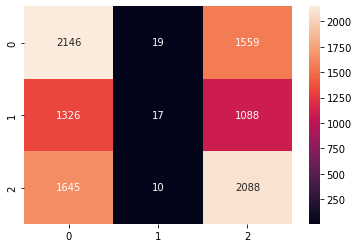

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.42      0.58      0.49      3724
           1       0.37      0.01      0.01      2431
           2       0.44      0.56      0.49      3743

    accuracy                           0.43      9898
   macro avg       0.41      0.38      0.33      9898
weighted avg       0.42      0.43      0.37      9898



### Applying Deep neural network

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(21, input_shape = (21,),  activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(7, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(
            optimizer = 'Adadelta',
            loss = 'binary_crossentropy',
            metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dropout (Dropout)           (None, 21)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 154       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, epochs = 10, batch_size= 50)

Epoch 1/10


ValueError: in user code:

    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 21), found shape=(None, 20)


In [ ]:
model.predict(X_test)

array([[0.7345042 ],
       [0.6798092 ],
       [0.58477366],
       ...,
       [0.5602285 ],
       [0.42602497],
       [0.7181812 ]], dtype=float32)

From the above results we can know the accuracy given by the Logistic Regression 

### Applying SVM

In [ ]:
# Fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [ ]:
# Predicting result
Y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)

<AxesSubplot:>

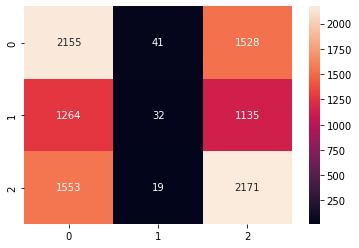

In [ ]:
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.43      0.58      0.50      3724
           1       0.35      0.01      0.03      2431
           2       0.45      0.58      0.51      3743

    accuracy                           0.44      9898
   macro avg       0.41      0.39      0.34      9898
weighted avg       0.42      0.44      0.38      9898



### Applying RandomForest

In [ ]:
# Fitting the RandomForest to the training set
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [ ]:
# Predicting result
Y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

<AxesSubplot:>

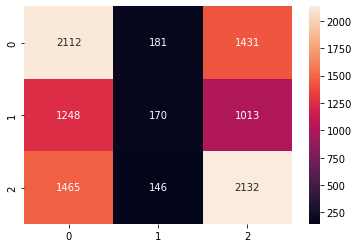

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.44      0.57      0.49      3724
           1       0.34      0.07      0.12      2431
           2       0.47      0.57      0.51      3743

    accuracy                           0.45      9898
   macro avg       0.42      0.40      0.37      9898
weighted avg       0.42      0.45      0.41      9898



Macro average is the usual average we’re used to seeing. Just add them all up and divide by how many there were. Weighted average considers how many of each class there were in its calculation, so fewer of one class means that it’s precision/recall/F1 score has less of an impact on the weighted average for each of those things. support, tells how many of each class there were: 5048 of draw, 7790 of class lose, 8315 of win. 

### Applying XGBoost

In [ ]:
#If xgboost has been previously been installed, please remove the comment symbol below and run this cell
#pip install xgboost

In [ ]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, Y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

<AxesSubplot:>

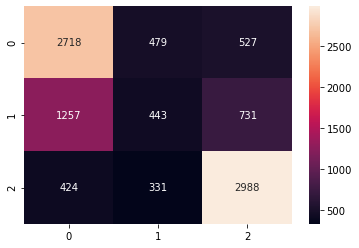

In [ ]:
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67      3724
           1       0.35      0.18      0.24      2431
           2       0.70      0.80      0.75      3743

    accuracy                           0.62      9898
   macro avg       0.56      0.57      0.55      9898
weighted avg       0.59      0.62      0.59      9898



Clearly RandomForest seems like the best model as it has the highest F1 score and accuracy score on the test set.

#### Comparing models
We can see that the scores of the models are not the same:
- No models can give the same accuracy most of the time
- It's important to analyze the result with model to get best out of the models
- Sometimes we need to perform multiple iterations to get the desired output with multiple models
- From above itselfs we can observe different model implementations on dataset and we have different output
- Boosting techniques can be used to improve accuracy of the model.

### Applying Linear Regression

We consider linear regression because, even when the regression does not have a strong predictive power, it can be used to determine 'which variables in particular are significant predictors of the outcome variables, and in what way [do] they impact the outcome variable'. (https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
for i in range(X.columns.size):
    print(X.columns[i],':', regressor.coef_[i])

1.001859745501685
player_number : -0.015194990577714229
attack_ratio : 0.21908494990370797
defender_ratio : 0.2233099295781845
midfield_ratio : 0.2670751770930938
avg_age_attack : 0.00522035802975521
avg_age_defender : 0.009247360531222423
avg_age_midfield : 0.021104112665011915
avg_age_goalkeeper : 0.01034977849485001
avg_height_attack : -0.0046247541340814656
avg_height_defender : -0.011520836487597469
avg_height_midfield : 0.010093667440423488
avg_height_goalkeeper : 0.009735495034293098
NA_ratio : -0.003427592458387803
SA_ratio : 0.02684683528678485
AS_ratio : -0.010300121760259842
AF_ratio : -0.0064570041160564
OC_ratio : -0.0021656350664268466
left_ratio : -0.007134456120889097
right_ratio : -0.005480129994175844
round : -0.022172738013579576
club_goals : 0.5468872392085077


From this, we can gather that some factors, such as (higher) average age of defenders can have a negative effect on the likelihood of winning

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
# Generate metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.5738533268640934
Mean Squared Error: 0.4479019175636742
Root Mean Squared Error: 0.669254747882803


However, at this point our Y_pred is not a suitable integer for output, and so it stands that we need to translate the prediction.
The regression gives figures very close to 1, and so all results would round to 1, i.e. 'draw' if done that way.
We create an adjustment that would output 0 (lose) for a Y_pred under value *min*, 2 (win) for a Y_pred over value *max*, or 1 (draw) otherwise.

In [ ]:
def adjustment(x, lower, upper):
    if x["Predicted"] < lower:
        return -1
    if x["Predicted"] > upper:
        return 1
    else:
        return 0

In [ ]:
# for example with min = -0.1, max = 0.1
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df['Adjusted'] = df.apply(adjustment, axis=1, args=(-0.1,0.1))
Y_pred_adj = df['Adjusted']
df

,Actual,Predicted,Adjusted
50928,1,0.798122,1
56635,1,0.927396,1
65825,2,1.326741,1
23605,2,1.301025,1
33335,2,0.894956,1
...,...,...,...
10260,2,1.291271,1
5223,0,0.779111,1
47745,2,1.317103,1
15357,0,0.611465,1


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_adj))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_adj))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_adj)))
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred_adj))

Mean Absolute Error: 0.7543948272378258
Mean Squared Error: 0.7543948272378258
Root Mean Squared Error: 0.8685590522456293
Accuracy: 0.24560517276217417


In [ ]:
# Calculate the best range by iterating through values of min and max (with steps of 0.05)
best_range = [0,0]
best_accuracy = 0
for min in np.arange(start=-1, stop=0.05, step=0.05):
    for max in np.arange(start=0, stop=1.05, step=0.05):
        df['Adjusted'] = df.apply(adjustment, axis=1, args=(min,max))
        Y_pred_adj = df['Adjusted']
        Accuracy = metrics.accuracy_score(Y_test, Y_pred_adj)
        #print('Accuracy for [' + str(min) + ',' + str(max) +']:', Accuracy)
        if Accuracy > best_accuracy:
            best_accuracy = Accuracy
            best_range = [min,max]
print('Best range is', best_range, 'which has accuracy', best_accuracy)

# note 8.881784197001252e-16 is effectively 0

Best range is [-1.0, 0.9] which has accuracy 0.4022024651444736


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(Y_test,y_pred)
cm = confusion_matrix(Y_test, y_pred)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aceb451a-c323-4d42-a6b2-6c4559d224cd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>